In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

import graphviz

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
cancer.filename

'c:\\python365\\lib\\site-packages\\sklearn\\datasets\\data\\breast_cancer.csv'

In [6]:
cancer.feature_names


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
cancer.data[0:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [9]:
cancer.target[0:5]

array([0, 0, 0, 0, 0])

In [10]:
cancer_df = pd.DataFrame(cancer.data, columns= cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
cancer_df.shape

(569, 30)

In [12]:
cancer_labels = pd.Series(cancer.target)
cancer_labels.head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

In [13]:
cancer_labels.shape

(569,)

In [14]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [15]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [16]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,
                                                test_size=0.2, random_state=42)

In [17]:
X_train.shape

(455, 30)

In [19]:
X_test.shape

(114, 30)

In [18]:
X_train[0:5]

array([[1.032e+01, 1.635e+01, 6.531e+01, 3.249e+02, 9.434e-02, 4.994e-02,
        1.012e-02, 5.495e-03, 1.885e-01, 6.201e-02, 2.104e-01, 9.670e-01,
        1.356e+00, 1.297e+01, 7.086e-03, 7.247e-03, 1.012e-02, 5.495e-03,
        1.560e-02, 2.606e-03, 1.125e+01, 2.177e+01, 7.112e+01, 3.849e+02,
        1.285e-01, 8.842e-02, 4.384e-02, 2.381e-02, 2.681e-01, 7.399e-02],
       [2.018e+01, 1.954e+01, 1.338e+02, 1.250e+03, 1.133e-01, 1.489e-01,
        2.133e-01, 1.259e-01, 1.724e-01, 6.053e-02, 4.331e-01, 1.001e+00,
        3.008e+00, 5.249e+01, 9.087e-03, 2.715e-02, 5.546e-02, 1.910e-02,
        2.451e-02, 4.005e-03, 2.203e+01, 2.507e+01, 1.460e+02, 1.479e+03,
        1.665e-01, 2.942e-01, 5.308e-01, 2.173e-01, 3.032e-01, 8.075e-02],
       [1.066e+01, 1.515e+01, 6.749e+01, 3.496e+02, 8.792e-02, 4.302e-02,
        0.000e+00, 0.000e+00, 1.928e-01, 5.975e-02, 3.309e-01, 1.925e+00,
        2.155e+00, 2.198e+01, 8.713e-03, 1.017e-02, 0.000e+00, 0.000e+00,
        3.265e-02, 1.002e-03, 1.154e

In [20]:
y_train[0:5]

array([1, 0, 1, 1, 1])

In [21]:
cancer_tree = DecisionTreeClassifier(random_state=24)

cancer_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=24,
            splitter='best')

In [22]:
print('Accuracy on training set: {:.3f}'.format(cancer_tree.score(X_train, y_train)))
print('Accuracy on testing set: {:.3f}'.format(cancer_tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on testing set: 0.904


In [23]:
cancer_tree = DecisionTreeClassifier(max_depth=4, random_state=24)
cancer_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=24,
            splitter='best')

In [24]:
print('Accuracy on training set: {:.3f}'.format(cancer_tree.score(X_train, y_train)))
print('Accuracy on testing set: {:.3f}'.format(cancer_tree.score(X_test, y_test)))

Accuracy on training set: 0.987
Accuracy on testing set: 0.930


In [25]:
cancer_tree1 = DecisionTreeClassifier(max_leaf_nodes=5, random_state=24)
cancer_tree1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=24, splitter='best')

In [26]:
print('Accuracy on training set: {:.3f}'.format(cancer_tree1.score(X_train, y_train)))
print('Accuracy on testing set: {:.3f}'.format(cancer_tree1.score(X_test, y_test)))

Accuracy on training set: 0.971
Accuracy on testing set: 0.939


In [27]:
export_graphviz(cancer_tree,
               out_file='cancer_tree.dot',
               class_names=cancer.target_names,
               feature_names=cancer.feature_names,
               filled=True)

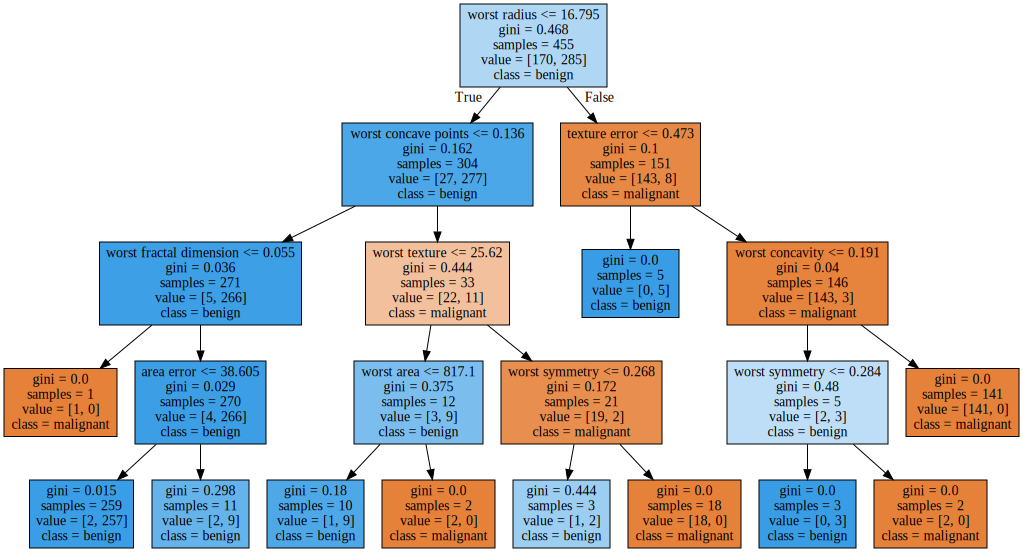

In [28]:
with open('cancer_tree.dot')as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)    

In [29]:
export_graphviz(cancer_tree1,
               out_file='cancer_tree1.dot',
               class_names=cancer.target_names,
               feature_names=cancer.feature_names,
               filled=True)

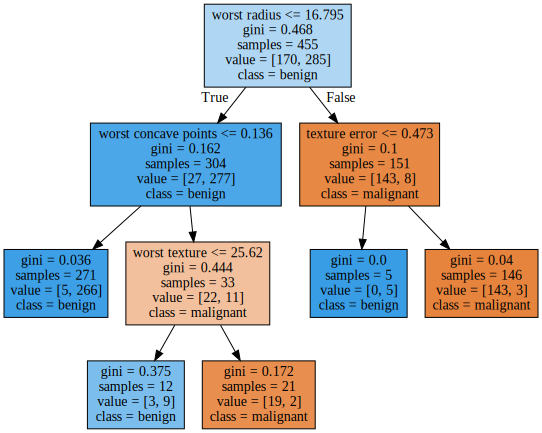

In [30]:
with open('cancer_tree1.dot')as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [31]:
print('Feature importances:\n{}'.format(cancer_tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.04578469
 0.         0.00315729 0.         0.         0.         0.
 0.         0.         0.73354757 0.03231926 0.         0.01332729
 0.         0.         0.01716116 0.12202752 0.02312884 0.00954637]


In [32]:
def plot_feature_importances_cancer_data(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Feature Imaportance")
    plt.ylabel("Feature")

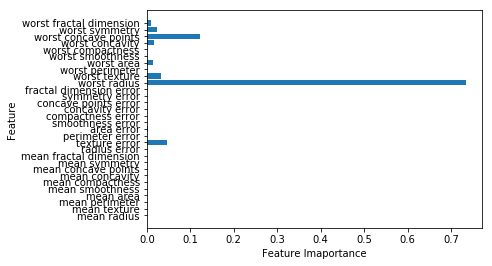

In [33]:
plot_feature_importances_cancer_data(cancer_tree)

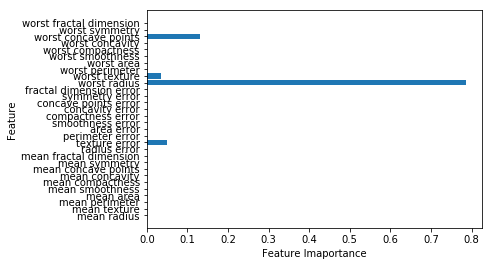

In [34]:
plot_feature_importances_cancer_data(cancer_tree1)

In [35]:
print('Feature importances:\n{}'.format(cancer_tree1.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.04903686
 0.         0.         0.         0.         0.         0.
 0.         0.         0.78565282 0.03461496 0.         0.
 0.         0.         0.         0.13069536 0.         0.        ]
